## Q1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load('/Users/pinyu/Documents/HW for 神經科學/HW/Computational-Neuroscience/hw4/hw04-data.npz')
print(list(data.keys()))

['i', 's', 'dt']


In [4]:
stim_current = data['i']
spike_train = data['s']
dt = data['dt']
duration = len(spike_train)*dt

In [5]:
print(stim_current)
print('stim_current shape: ', stim_current.shape)
print('spike_train shape: ', spike_train.shape)
print('spike_train: ', spike_train)
print('dt:', dt)
print('duration: ', duration)

[0.1738684  0.30502604 0.40065876 ... 0.21839242 0.44954835 1.00161045]
stim_current shape:  (1000000,)
spike_train shape:  (1000000,)
spike_train:  [0 0 0 ... 0 0 0]
dt: 0.0625
duration:  62500.0


In [6]:
win_range = [-3, 2]
print(win_range/dt)
[win_index_start, win_index_end] = (win_range/dt).astype(int)
print(win_index_start, win_index_end)

[-48.  32.]
-48 32


因delta time較window寬度大，因此幾乎只有在spike當下的input會被記錄進來

In [7]:
spike_triggered_ave = np.mean([
    stim_current[win_index_start+index:win_index_end+index]
    for index in np.where(spike_train)[0]
    if index+win_index_start >= 0 and index+win_index_end < len(spike_train)],axis=0
)-stim_current.mean()
print(spike_triggered_ave)

[ 1.08288827e-02  5.07278592e-03 -3.67665209e-03  1.06191965e-02
  2.51600027e-02  1.85949787e-02  1.57525988e-02  1.46571357e-02
  2.22402059e-02  1.17786286e-02  2.37718081e-02  2.19034635e-02
  2.07216930e-02  3.44977902e-02  3.45790539e-02  5.44258421e-02
  5.33612511e-02  4.89532865e-02  5.46547255e-02  6.06036307e-02
  6.12443943e-02  6.30715014e-02  6.64275510e-02  8.33389354e-02
  8.40304942e-02  7.29400497e-02  9.34518657e-02  1.08852214e-01
  1.12019923e-01  1.07108744e-01  1.20862145e-01  1.49741522e-01
  1.67874245e-01  1.75748283e-01  1.92736975e-01  2.23224344e-01
  2.45922047e-01  2.75977548e-01  3.03927534e-01  3.39380166e-01
  3.62873697e-01  4.11474810e-01  4.46651288e-01  5.06725161e-01
  5.75141684e-01  6.70371124e-01  7.61272006e-01  8.71192966e-01
  9.60601832e-01  5.67109806e-01  3.50879139e-01  2.08238451e-01
  1.24136839e-01  7.51963496e-02  4.84171622e-02  3.14925877e-02
  1.69723417e-02  1.80433604e-02  1.25702105e-02  1.36080873e-02
 -4.05151295e-03 -5.29098

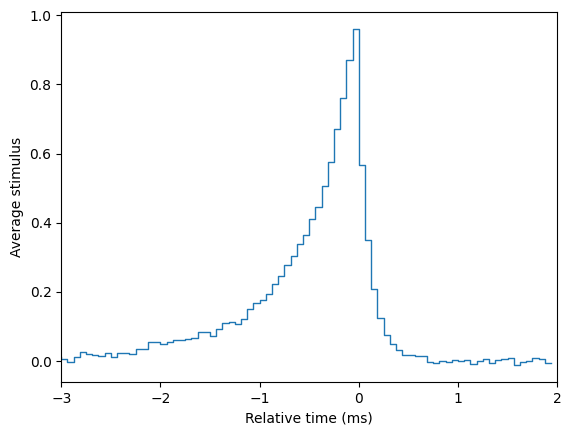

In [8]:
plt.step(np.arange(*win_range,dt),spike_triggered_ave,lw=1)
plt.xlim(win_range)
plt.xlabel('Relative time (ms)')
plt.ylabel('Average stimulus')
plt.show()

The correlation in the input affect the result to be non-causal

## Q2

In [9]:
from scipy.io import loadmat
dat = loadmat('/Users/pinyu/Documents/HW for 神經科學/HW/Computational-Neuroscience/hw4/c1p8.mat') # This gives a `dict`
stimulus_inputs = dat['stim'][:,0]
spike_train2 = dat['rho'][:,0]

In [10]:
delta_t = 0.002

In [11]:
print('stimulus input shape: ', stimulus_inputs.shape)
print('spike_train shape: ', spike_train.shape)

stimulus input shape:  (600000,)
spike_train shape:  (1000000,)


In [12]:
#記得將win_range設為np.array形式
win_range2 = np.array([-0.3, 0.1])
[win_index_start2, win_index_end2] = (win_range2/delta_t).astype(int)
print(win_index_start2, win_index_end2)

-150 50


In [13]:
spike_triggered_ave2 = np.mean([
    stimulus_inputs[win_index_start2+index:win_index_end2+index]
    for index in np.where(spike_train2)[0]
    if index+win_index_start2 >= 0 and index+win_index_end2 < len(spike_train2)],axis=0
)-stimulus_inputs.mean()

Text(0, 0.5, 'Average stimulus input')

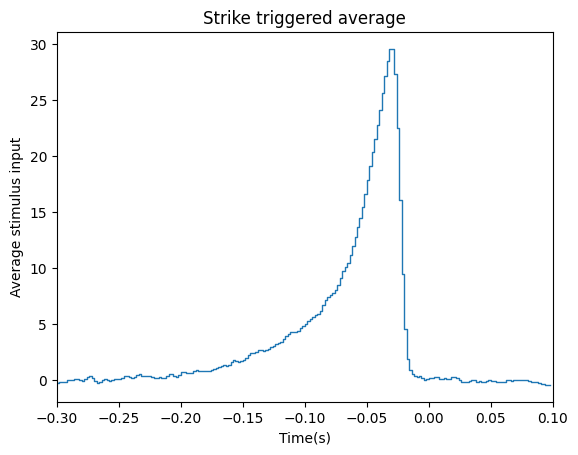

In [14]:
plt.step(np.arange(*win_range2, delta_t), spike_triggered_ave2, lw=1)
plt.xlim(win_range2)
plt.title('Strike triggered average')
plt.xlabel('Time(s)')
plt.ylabel('Average stimulus input')

## Q3

To plot the spike train from code04

In [15]:
# Generate made-up stimulus input
rng = np.random.default_rng(123)
noise = rng.normal(size=10000)
window = np.exp(-np.arange(0,200)/40)
window /= window.sum()
input_currents = np.convolve(noise,window)[:-len(window)+1] # Create some correlation in input current

In [16]:
print('processing',num_frames:=len(input_currents),'frames')
delta_t3 = 0.001
times = np.arange(num_frames)*delta_t3    # Time frames
duration = num_frames*delta_t3
time_range = np.array([0,duration]) # Time range

processing 10000 frames


In [17]:
win_range = np.array([-0.3,0.2]) # Kernel time range
win_times = np.arange(*win_range,delta_t3) # Kernel time frames
# Make up a nontrivil kernel
win_kernel = np.exp(-win_times/.032)-1.8*np.exp(-win_times/.016)+0.8*np.exp(-win_times/.008)
win_kernel *= (win_times>0)  # Make negative delay part zero (causal)
win_kernel /= max(win_kernel) # Normalize max to 1

In [18]:
# Linear filter and nonlinear rectification...
front_drop = (win_times<0).sum() # Number of frames to drop in front
rect = lambda x:np.log(1+np.exp(x)) # Some rectifying function
mu_values = rect(np.convolve(input_currents,win_kernel)[front_drop:front_drop-len(win_kernel)+1])

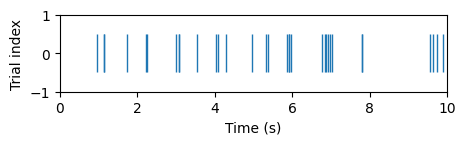

In [19]:
num_trials = 1
for seed in range(num_trials):
    rng = np.random.default_rng(123)
    spike_train = rng.uniform(size=mu_values.shape)<mu_values*delta_t3
    plt.figure(figsize=(5,1))
    plt.vlines(np.where(spike_train)[0]*delta_t3,seed-.5,seed+.5,lw=1)
plt.xlim(time_range)
plt.ylim(-1,num_trials)
plt.xlabel('Time (s)')
plt.ylabel('Trial index')
plt.show()

In [20]:
win_range3 = np.array([-0.3, 0.2])
[win_index_start3, win_index_end3] = (win_range3/delta_t3).astype(int)
print(win_index_start3, win_index_end3)

-300 200


In [21]:
spike_triggered_ave3_1 = np.mean([
    input_currents[win_index_start3+index:win_index_end3+index]
    for index in np.where(spike_train)[0]
    if index+win_index_start3 >= 0 and index+win_index_end3 < len(spike_train)],axis=0
)-input_currents.mean()

Text(0, 0.5, 'Average stimulus input')

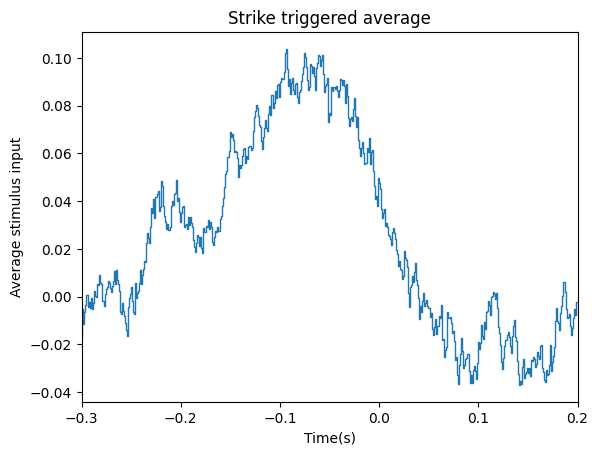

In [22]:
plt.step(np.arange(*win_range3, delta_t3), spike_triggered_ave3_1, lw=1)
plt.xlim(win_range3)
plt.title('Strike triggered average')
plt.xlabel('Time(s)')
plt.ylabel('Average stimulus input')

Part 2. Change the size of input currents array to 10^8

In [23]:
rng = np.random.default_rng(123)
noise = rng.normal(size=int(1e8))
window = np.exp(-np.arange(0,200)/40)
window /= window.sum()
input_currents = np.convolve(noise,window)[:-len(window)+1]

In [24]:
print('processing',num_frames:=len(input_currents),'frames')
delta_t3 = 0.001
times = np.arange(num_frames)*delta_t3
duration = num_frames*delta_t3
time_range = np.array([0,duration])

processing 100000000 frames


In [ ]:
win_range = np.array([-0.3,0.2]) # Kernel time range
win_times = np.arange(*win_range,delta_t3) # Kernel time frames
# Make up a nontrivil kernel
win_kernel = np.exp(-win_times/.032)-1.8*np.exp(-win_times/.016)+0.8*np.exp(-win_times/.008)
win_kernel *= (win_times>0)  # Make negative delay part zero (causal)
win_kernel /= max(win_kernel) # Normalize max to 1

# Linear filter and nonlinear rectification...
front_drop = (win_times<0).sum() # Number of frames to drop in front
rect = lambda x:np.log(1+np.exp(x)) # Some rectifying function
mu_values = rect(np.convolve(input_currents,win_kernel)[front_drop:front_drop-len(win_kernel)+1])

In [96]:
num_trials = 1
for seed in range(num_trials):
    rng = np.random.default_rng(123)
    spike_train = rng.uniform(size=mu_values.shape)<mu_values*delta_t3

In [97]:
spike_triggered_ave3_2 = np.mean([
    input_currents[win_index_start3+index:win_index_end3+index]
    for index in np.where(spike_train)[0]
    if index+win_index_start3 >= 0 and index+win_index_end3 < len(spike_train)],axis=0
)-input_currents.mean()

Text(0, 0.5, 'Average stimulus input')

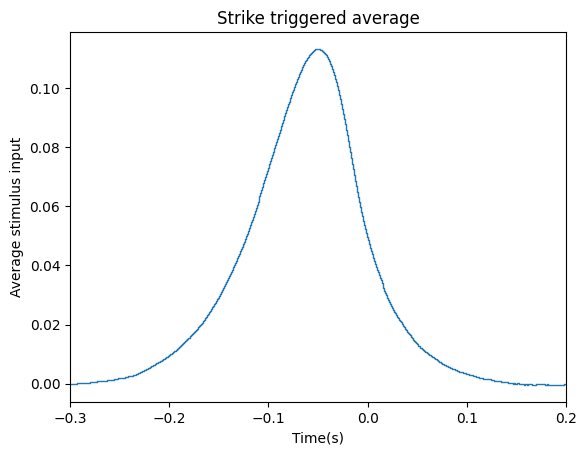

In [98]:
plt.step(np.arange(*win_range3, delta_t3), spike_triggered_ave3_2, lw=1)
plt.xlim(win_range3)
plt.title('Strike triggered average')
plt.xlabel('Time(s)')
plt.ylabel('Average stimulus input')

Part 3. Change input currents into noise

In [99]:
rng = np.random.default_rng(123)
noise = rng.normal(size=int(1e8))
window = np.exp(-np.arange(0,200)/40)
window /= window.sum()
input_currents = noise

In [100]:
print('processing',num_frames:=len(input_currents),'frames')
delta_t3 = 0.001
times = np.arange(num_frames)*delta_t3
duration = num_frames*delta_t3
time_range = np.array([0,duration])

processing 100000000 frames


In [101]:
win_range = np.array([-0.3,0.2]) # Kernel time range
win_times = np.arange(*win_range,delta_t3) # Kernel time frames
# Make up a nontrivil kernel
win_kernel = np.exp(-win_times/.032)-1.8*np.exp(-win_times/.016)+0.8*np.exp(-win_times/.008)
win_kernel *= (win_times>0)  # Make negative delay part zero (causal)
win_kernel /= max(win_kernel) # Normalize max to 1

# Linear filter and nonlinear rectification...
front_drop = (win_times<0).sum() # Number of frames to drop in front
rect = lambda x:np.log(1+np.exp(x)) # Some rectifying function
mu_values = rect(np.convolve(input_currents,win_kernel)[front_drop:front_drop-len(win_kernel)+1])

In [102]:
print(win_times.shape)

(500,)


In [103]:
num_trials = 1
for seed in range(num_trials):
    rng = np.random.default_rng(123)
    spike_train = rng.uniform(size=mu_values.shape)<mu_values*delta_t3

In [104]:
spike_triggered_ave3_3 = np.mean([
    input_currents[win_index_start3+index:win_index_end3+index]
    for index in np.where(spike_train)[0]
    if index+win_index_start3 >= 0 and index+win_index_end3 < len(spike_train)],axis=0
)-input_currents.mean()

Text(0, 0.5, 'Average stimulus input')

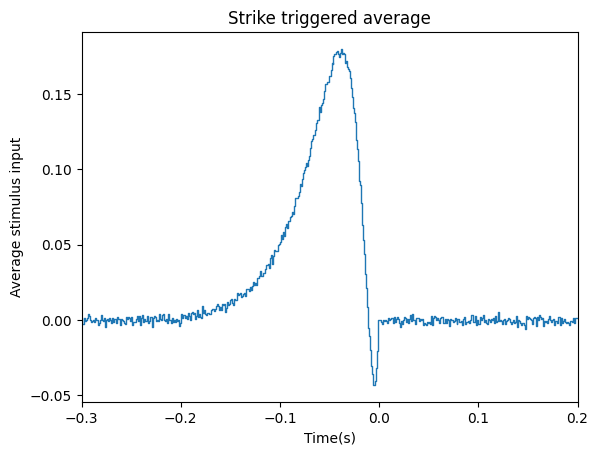

In [105]:
plt.step(np.arange(*win_range3, delta_t3), spike_triggered_ave3_3, lw=1)
plt.xlim(win_range3)
plt.title('Strike triggered average')
plt.xlabel('Time(s)')
plt.ylabel('Average stimulus input')

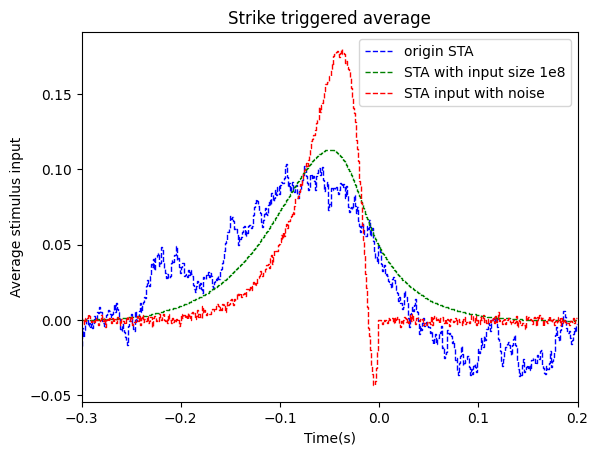

Text(0.5, 1.0, 'Window kernal')

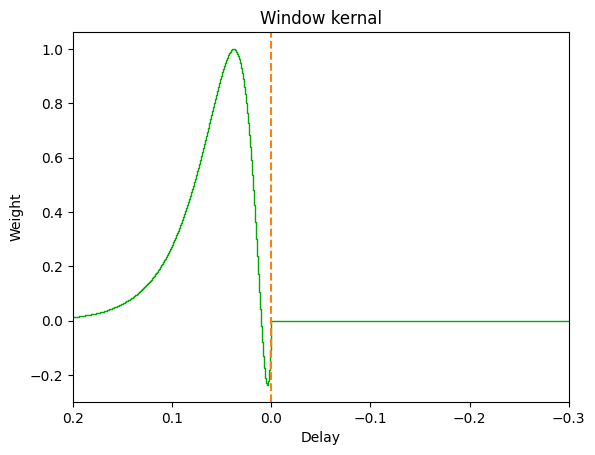

In [114]:
plt.step(np.arange(*win_range3, delta_t3), spike_triggered_ave3_1, 'b--', lw=1, label='origin STA')
plt.step(np.arange(*win_range3, delta_t3), spike_triggered_ave3_2, 'g--', lw=1, label='STA with input size 1e8')
plt.step(np.arange(*win_range3, delta_t3), spike_triggered_ave3_3, 'r--', lw=1, label='STA input with noise')
plt.xlim(win_range3)
plt.legend(loc='best')
plt.xlabel('Time(s)')
plt.ylabel('Average stimulus input')
plt.title('Strike triggered average')
plt.show()

plt.step(np.arange(*win_range3, delta_t3), win_kernel, color='#0a0', lw=1, label='window kernel')
plt.axvline(0,ls='--',color='C1')
plt.ylabel('Weight')
plt.xlabel('Delay')
plt.xlim(win_range3[::-1])
plt.title('Window kernal')

